<a href="https://colab.research.google.com/github/sanusarang/tangled-flower-animation-python/blob/main/tangled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

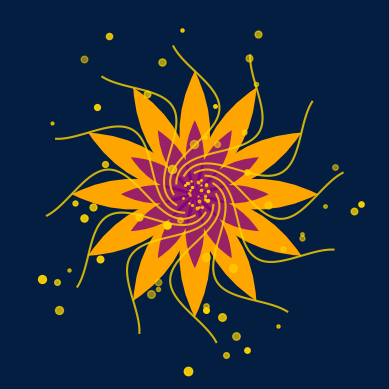

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D
from matplotlib.animation import FuncAnimation, PillowWriter
import os

def create_petal_path(radius, petal_width):
    verts = [
        (0, 0),  # start point
        (radius / 2, petal_width / 2),  # control point 1
        (radius, 0),  # end point
        (radius / 2, -petal_width / 2),  # control point 2
        (0, 0)  # start point to close the petal
    ]
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]
    return Path(verts, codes)

def draw_flower(ax, num_petals, petal_radius, petal_width, color, alpha):
    for i in range(num_petals):
        angle = 360 / num_petals * i
        path = create_petal_path(petal_radius, petal_width)
        patch = PathPatch(path, facecolor=color, edgecolor='none', alpha=alpha)
        transform = Affine2D().rotate_deg(angle).translate(0, 0) + ax.transData
        patch.set_transform(transform)
        ax.add_patch(patch)

def draw_tentacles(ax, num_tentacles, length, width, color):
    angles = np.linspace(0, 360, num_tentacles, endpoint=False)
    tentacle_lines = []
    for angle in angles:
        x = np.linspace(0, length, 100)
        y = width * np.sin(x / length * 2 * np.pi)
        line, = ax.plot(x, y, color=color, lw=1.5, alpha=0.8)
        trans = Affine2D().rotate_deg(angle).translate(0, 0) + ax.transData
        line.set_transform(trans)
        tentacle_lines.append(line)
    return tentacle_lines

def draw_glow_spots(ax, num_spots, radius, color):
    spots = []
    for _ in range(num_spots):
        x, y = np.random.uniform(-radius, radius, 2)
        while np.sqrt(x**2 + y**2) > radius:
            x, y = np.random.uniform(-radius, radius, 2)
        spot, = ax.plot(x, y, 'o', color=color, alpha=np.random.uniform(0.5, 1.0), markersize=np.random.uniform(2, 6))
        spots.append(spot)
    return spots

def draw_central_glow_spots(ax, num_spots, radius, color):
    spots = []
    for _ in range(num_spots):
        x, y = np.random.uniform(-radius/4, radius/4, 2)  # Reduce the range to concentrate spots at the center
        while np.sqrt(x**2 + y**2) > radius/4:
            x, y = np.random.uniform(-radius/4, radius/4, 2)
        spot, = ax.plot(x, y, 'o', color=color, alpha=np.random.uniform(0.5, 1.0), markersize=np.random.uniform(0.5, 2))
        spots.append(spot)
    return spots

def update_tentacles(tentacle_lines, frame):
    for line in tentacle_lines:
        xdata = line.get_xdata()
        ydata = np.sin(xdata / tentacle_length * 2 * np.pi + frame / 10.0) * tentacle_width
        line.set_ydata(ydata)

def update_glow_spots(spots, frame):
    for spot in spots:
        spot.set_alpha(np.random.uniform(0.5, 1.0))
        spot.set_markersize(np.random.uniform(2, 6))

def update_central_glow_spots(spots, frame):
    for spot in spots:
        spot.set_alpha(np.random.uniform(0.5, 1.0))
        spot.set_markersize(np.random.uniform(0.5, 2))

# Parameters for the flower
num_petals = 12
petal_radius = 10
petal_width = 5

# Parameters for the inner purple petals
inner_petal_radius = petal_radius * 0.6  # Smaller than the yellow petals
inner_petal_width = petal_width * 0.6

# Parameters for the tentacles and glow spots
num_tentacles = 12
tentacle_length = 12
tentacle_width = 2
num_spots = 50
glow_radius = 15
num_central_spots = 30
central_glow_radius = 5

# Create the plot
fig, ax = plt.subplots()
fig.patch.set_facecolor('#041E42')
ax.set_facecolor('#041E42')
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-glow_radius, glow_radius)
ax.set_ylim(-glow_radius, glow_radius)

# Draw the outer bright orange petals
draw_flower(ax, num_petals, petal_radius, petal_width, '#FFA500', 1.0)  # Bright orange

# Draw the inner purple petals
draw_flower(ax, num_petals, inner_petal_radius, inner_petal_width, 'purple', 0.8)

# Draw the tentacles
tentacle_lines = draw_tentacles(ax, num_tentacles, tentacle_length, tentacle_width, 'gold')

# Draw the glow spots
spots = draw_glow_spots(ax, num_spots, glow_radius, 'gold')

# Draw the central glow spots
central_spots = draw_central_glow_spots(ax, num_central_spots, central_glow_radius, 'gold')

# Animation update function
def update(frame):
    update_tentacles(tentacle_lines, frame)
    update_glow_spots(spots, frame)
    update_central_glow_spots(central_spots, frame)

# Create animation
ani = FuncAnimation(fig, update, frames=200, interval=50, repeat=True)

# Ensure the output directory exists
output_path = '/content/animated_flower_bright_orange.gif'
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the animation as a GIF
ani.save(output_path, writer=PillowWriter(fps=20))

plt.show()


In [3]:
from google.colab import files
files.download('/content/animated_flower_bright_orange.gif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>